In [120]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [121]:
path = r"C:\Users\Davi\Documents\Projetos\FIAP\FASE 5\Enterprise_Challenge_FASE3\config\Dados_simulados.csv"
df = pd.read_csv(path, sep=';')
df[['vl_temperatura', 'vl_corrente']] = df[['vl_temperatura', 'vl_corrente']].round(2)
df['vl_vibracao'] = df['vl_vibracao'].astype(int)
display(df)

,id_registro,id_sistema,id_maquina,id_lote,timestamp_registro,vl_temperatura,vl_vibracao,vl_corrente
0,1,4,6,4,2025-08-01 03:00:00.000000000,66.01,8,150.94
1,2,3,6,4,2025-08-01 03:06:48.526006222,64.10,2,150.74
2,3,4,1,3,2025-08-01 03:13:37.052012205,73.01,5,150.28
3,4,4,2,3,2025-08-01 03:20:25.578018427,80.82,2,146.66
4,5,3,1,4,2025-08-01 03:27:14.104024410,59.11,5,150.22
...,...,...,...,...,...,...,...,...
4995,4996,1,1,5,2025-08-24 17:49:47.400513649,99.04,7,157.64
4996,4997,3,5,5,2025-08-24 17:56:35.926519632,92.42,0,148.23
4997,4998,1,6,3,2025-08-24 18:03:24.452525854,73.52,2,141.52
4998,4999,1,6,2,2025-08-24 18:10:12.978531837,45.93,6,145.01


In [122]:
def classificar_risco_temp(temperatura):
    if temperatura < 85:
        return 'Normal'
    elif 85 <= temperatura < 95:
        return 'Atencao'
    else:
        return 'Risco Iminente'

def classificar_risco_corrente(corrente):
    if corrente <= 152:
        return 'Normal'
    elif corrente < 155:
        return 'Atencao'
    else:
        return 'Risco Iminente'

In [123]:
df_temperatura = df.copy()
df_temperatura['risco'] = df_temperatura['vl_temperatura'].apply(classificar_risco_temp)
display(df_temperatura)

,id_registro,id_sistema,id_maquina,id_lote,timestamp_registro,vl_temperatura,vl_vibracao,vl_corrente,risco
0,1,4,6,4,2025-08-01 03:00:00.000000000,66.01,8,150.94,Normal
1,2,3,6,4,2025-08-01 03:06:48.526006222,64.10,2,150.74,Normal
2,3,4,1,3,2025-08-01 03:13:37.052012205,73.01,5,150.28,Normal
3,4,4,2,3,2025-08-01 03:20:25.578018427,80.82,2,146.66,Normal
4,5,3,1,4,2025-08-01 03:27:14.104024410,59.11,5,150.22,Normal
...,...,...,...,...,...,...,...,...,...
4995,4996,1,1,5,2025-08-24 17:49:47.400513649,99.04,7,157.64,Risco Iminente
4996,4997,3,5,5,2025-08-24 17:56:35.926519632,92.42,0,148.23,Atencao
4997,4998,1,6,3,2025-08-24 18:03:24.452525854,73.52,2,141.52,Normal
4998,4999,1,6,2,2025-08-24 18:10:12.978531837,45.93,6,145.01,Normal


In [124]:
df_corrente = df.copy()
df_corrente['risco'] = df_corrente['vl_corrente'].apply(classificar_risco_corrente)
display(df_corrente)

,id_registro,id_sistema,id_maquina,id_lote,timestamp_registro,vl_temperatura,vl_vibracao,vl_corrente,risco
0,1,4,6,4,2025-08-01 03:00:00.000000000,66.01,8,150.94,Normal
1,2,3,6,4,2025-08-01 03:06:48.526006222,64.10,2,150.74,Normal
2,3,4,1,3,2025-08-01 03:13:37.052012205,73.01,5,150.28,Normal
3,4,4,2,3,2025-08-01 03:20:25.578018427,80.82,2,146.66,Normal
4,5,3,1,4,2025-08-01 03:27:14.104024410,59.11,5,150.22,Normal
...,...,...,...,...,...,...,...,...,...
4995,4996,1,1,5,2025-08-24 17:49:47.400513649,99.04,7,157.64,Risco Iminente
4996,4997,3,5,5,2025-08-24 17:56:35.926519632,92.42,0,148.23,Normal
4997,4998,1,6,3,2025-08-24 18:03:24.452525854,73.52,2,141.52,Normal
4998,4999,1,6,2,2025-08-24 18:10:12.978531837,45.93,6,145.01,Normal


In [93]:
x_train, x_test, y_train, y_test = train_test_split(df_temperatura[['vl_temperatura']], df_temperatura['risco'], random_state=4, test_size=0.3, stratify=df_temperatura['risco'])
print('X TEST\n', x_test.head(5))
print('X TRAIN\n', x_train.head(5))
print('Y TEST\n', y_test.head(5))
print('Y TRAIN\n', y_train.head(5))

X TEST
       vl_temperatura
3886           71.64
434            57.63
893            70.14
1917           45.88
74             85.95
X TRAIN
       vl_temperatura
4048           45.93
3825           57.92
2921           45.08
1565          118.94
3077           54.06
Y TEST
 3886     Normal
434      Normal
893      Normal
1917     Normal
74      Atencao
Name: risco, dtype: object
Y TRAIN
 4048            Normal
3825            Normal
2921            Normal
1565    Risco Iminente
3077            Normal
Name: risco, dtype: object


In [94]:
modelo = RandomForestClassifier(n_estimators=100, random_state=4)
modelo.fit(x_train, y_train)

pred = modelo.predict(x_test)

In [95]:
accuracy = accuracy_score(y_test, pred)
print(f"Acurácia do Modelo: {accuracy * 100:.2f}%")

Acurácia do Modelo: 100.00%



Relatório de Classificação:
                precision    recall  f1-score   support

       Atencao       1.00      1.00      1.00       168
        Normal       1.00      1.00      1.00      1266
Risco Iminente       1.00      1.00      1.00        66

      accuracy                           1.00      1500
     macro avg       1.00      1.00      1.00      1500
  weighted avg       1.00      1.00      1.00      1500


Gráfico da Matriz de Confusão salvo como 'matriz_confusao.png'


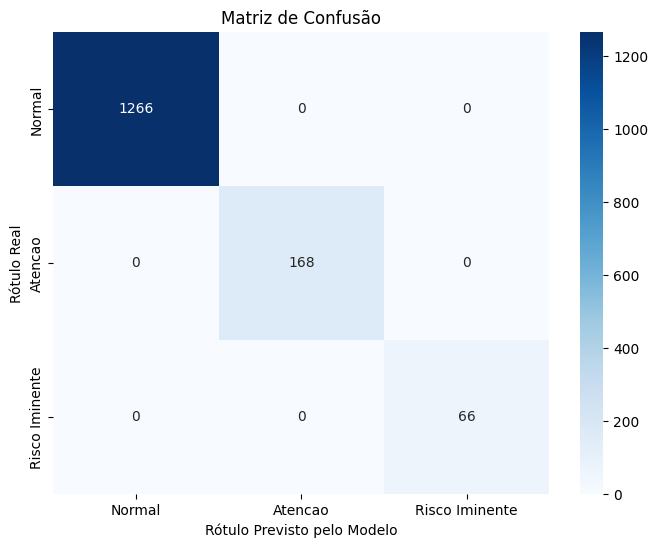

In [ ]:
# Relatório de Classificação Detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, pred))


In [ ]:

# Gerar a Matriz de Confusão
cm = confusion_matrix(y_test, pred, labels=['Normal', 'Atencao', 'Risco Iminente'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Atencao', 'Risco Iminente'], 
            yticklabels=['Normal', 'Atencao', 'Risco Iminente'])
plt.xlabel('Rótulo Previsto pelo Modelo')
plt.ylabel('Rótulo Real')
plt.title('Matriz de Confusão')

# Salva a imagem da matriz de confusão em um arquivo
plt.savefig('matriz_confusao.png')
print("\nGráfico da Matriz de Confusão salvo como 'matriz_confusao.png'")
plt.show()

In [ ]:
# Define o tamanho da figura que será gerada
plt.figure(figsize=(10, 7))

# A função principal do Seaborn para desenhar o mapa de calor (heatmap)
sns.heatmap(
    cm, 
    annot=True,      # Escreve os números dentro de cada célula do gráfico
    fmt='d',         # Formata os números como inteiros
    cmap='Blues',    # Define o esquema de cores (tons de azul)
    xticklabels=['NORMAL', 'ATENÇÃO', 'RISCO'], # Rótulos para o eixo X
    yticklabels=['NORMAL', 'ATENÇÃO', 'RISCO']  # Rótulos para o eixo Y
)

# 3. Adicionar Títulos e Rótulos para Clareza
plt.title('Matriz de Confusão')
plt.ylabel('Rótulo Verdadeiro (Real)')
plt.xlabel('Rótulo Previsto (Modelo)')

# 4. Salvar e Exibir o Gráfico
# Salva a figura gerada em um arquivo de imagem PNG
plt.savefig('matriz_confusao_resultado.png')

# Exibe o gráfico na tela (se estiver usando um ambiente como Jupyter Notebook)
plt.show()